<img src="numpy_logo.png" alt="Drawing" style="width: 200px;"/>

# Numpy. Работа с матрицами. Векторизация.

Модуль numerical python (Numpy http://www.numpy.org) для работы с матрицами. Векторизация вместо циклов. Индексация и срезы в массивах. Чтение и запись файлов с помощью Numpy. 

Полезные клавиши в juputer 

- tab автодополнение
- shift+tab - документация

## Содержание

- [Общая характеристика Numpy](#about)
- [Установка SciPy](#installing)
- [Создание массивов](#arrays)
- [Операции над матрицами, broadcasting](#operations) 
- Векторизация
- Индексация, срезы, выбор по условию 
- Считывание csv файлов в numpy массив, преобразование типов
- Изменение размеров матриц, добавление строк, столбцов
- Пример с линейной регрессией (нормальное уравление)
- Pandas

## Общая характеристика Numpy <a id="about"></a>

NumPy это фундаментальный пакет для научных вычислений с Python. Он содержит большое количество полезных особенностей:

- Мощные N-мерные объект массивов
- Сложные функции
- Инструменты для интеграции с C/C++ и Fortran кодом 
- Полезная линейная алгебра, преобразования Фурье и случайние числа 

Numpy предоставляет функции, которые позволяют оперировать многомернами массивами. 









---



## Установка <a id="installing"></a>
    
лучше устанавливать полный набор SciPy:
https://www.scipy.org/install.html 

```
pip3 install numpy scipy matplotlib ipython jupyter pandas sympy nose

```

Для windows проще всего взять готовые пакеты:

http://www.lfd.uci.edu/~gohlke/pythonlibs/


## Создание массивов <a id="arrays"></a>

Для создания Numpy массива нужно вызывать метод ```np.array```. Для просмотра документации по методу в jupyter notebook можно нажать ```shift+tab```.

У объектов array есть много методов, подробнее можно посмотреть нажетием клавиши ```tab```. 

Полезным свойством объекта ```array``` является ```shape```, позволяет узнать размерности массива. 

Свойство ```dtype``` позволяет узнать, какой тип данных используется для хранения элементов массив, его можно изменить. 

In [2]:
import numpy as np

a = np.array([1,2,3,4])

print(a.shape)
print(a)
print(a.dtype)
print(type(a))

(4,)
[1 2 3 4]
int64
<class 'numpy.ndarray'>


In [3]:
a*a.T

array([ 1,  4,  9, 16])

In [4]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print(a.size)
print(a.dtype)
print(type(a))

[[1 2 3]
 [4 5 6]]
(2, 3)
6
int64
<class 'numpy.ndarray'>


Создание разных видов матриц: единичные, диогональные, нулевые.

In [5]:
E = np.eye(5)
print(E)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [6]:
d = np.diag([1,2,3,4])
print(d)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [7]:
Z=np.zeros((2,3))
print(Z)


[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [8]:
np.empty(5)

array([ 1.,  1.,  1.,  1.,  1.])

## Операции над матрицами. Broadcasting.  <a id="operations"></a>

Особенность numpy в том, что он работает с матрицами как с единой сущностью и проводит всевозможные оптимизации. В Numpy существует набор операций, котрые выполняются над всей матрицей, broadcasting.

In [9]:
# Операции
import numpy as np 

A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[2,2],[2,2],[2,1]])
print(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[2 2]
 [2 2]
 [2 1]]


In [10]:
# Сложение, вычитание
print(A+B)
print(B+A)
print(A-B)
print(B-A)

C = np.array([[1,2],[2,3]])

[[3 4]
 [5 6]
 [7 7]]
[[3 4]
 [5 6]
 [7 7]]
[[-1  0]
 [ 1  2]
 [ 3  5]]
[[ 1  0]
 [-1 -2]
 [-3 -5]]


In [11]:
A+C

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [12]:
# Транспанирование
print(A)
print(A.T)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


In [13]:
# Поэлементное умножение
print(A)
print("*")
print(B)
print("=")
print(A*B)

[[1 2]
 [3 4]
 [5 6]]
*
[[2 2]
 [2 2]
 [2 1]]
=
[[ 2  4]
 [ 6  8]
 [10  6]]


In [14]:
# Матричное умножение (операция не коммутативная)

# print(A.dot(B))
print(A.dot(B.T))
print(A.T.dot(B))

[[ 6  6  4]
 [14 14 10]
 [22 22 16]]
[[18 13]
 [24 18]]


In [15]:
# Умножение матрицы на число, добавление числа 
print(B)
print(B*2)
print(B + 10)

[[2 2]
 [2 2]
 [2 1]]
[[4 4]
 [4 4]
 [4 2]]
[[12 12]
 [12 12]
 [12 11]]


In [16]:
# Broadcast операции
print(np.sin(B))
print(np.exp(B))



[[ 0.90929743  0.90929743]
 [ 0.90929743  0.90929743]
 [ 0.90929743  0.84147098]]
[[ 7.3890561   7.3890561 ]
 [ 7.3890561   7.3890561 ]
 [ 7.3890561   2.71828183]]


### Инвертирование матриц 

По мат. определению обратная матрица это: $A A^{-1}=E$. Инвертировать можно только квадратную матрицу, с рангом матрицы, равным её размеру, т.е. матрица должна быть не вырожденная. На практике же есть возможность получить псевдо обратную матрицу, в случае, если матрица вырождена.

In [17]:
import numpy as np 
# Операция получения обратной матрицы
from numpy.linalg import inv
# Операция получения псевдо обратной матрицы
from numpy.linalg import pinv

In [18]:
# Для не вырожденных матриц результат обоих функций будет одинаковый. 

A = np.array([[1,2],[3,4]])
A_inv = inv(A)
A_pinv = pinv(A)

print(A)
print(A_inv)
print(A_pinv)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [19]:
# Проверим свойства обратной матрицы

print(A.dot(A_inv))
print(A.dot(A_pinv))

[[  1.00000000e+00   0.00000000e+00]
 [  8.88178420e-16   1.00000000e+00]]
[[  1.00000000e+00  -6.66133815e-16]
 [  8.88178420e-16   1.00000000e+00]]


C учётом погрешности вычислений, свойств выполняется $AA^{-1}=E$

Также из свойства $A E = A$ следует что $A A^{-1} A = A$, проверим:

In [20]:
print(A.dot(A_inv).dot(A))
print(A.dot(A_pinv).dot(A))

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  2.]
 [ 3.  4.]]


Примеры с вырожденной матрицей. Дополнительная информация https://www.quora.com/What-is-the-difference-between-pinv-and-inv 

In [21]:
B = np.array([
    [16, 2, 3, 13],
    [5, 11, 10, 8],
    [9, 7, 6, 12],
    [4, 14, 15, 1]]
)

print(B)
print(np.linalg.matrix_rank(B),"ранг матрицы не равен 4, матрица вырождена")

[[16  2  3 13]
 [ 5 11 10  8]
 [ 9  7  6 12]
 [ 4 14 15  1]]
3 ранг матрицы не равен 4, матрица вырождена


In [22]:
print(inv(B))
print(pinv(B))

[[  9.38249922e+13   2.81474977e+14  -2.81474977e+14  -9.38249922e+13]
 [  2.81474977e+14   8.44424930e+14  -8.44424930e+14  -2.81474977e+14]
 [ -2.81474977e+14  -8.44424930e+14   8.44424930e+14   2.81474977e+14]
 [ -9.38249922e+13  -2.81474977e+14   2.81474977e+14   9.38249922e+13]]
[[ 0.10110294 -0.07389706 -0.06139706  0.06360294]
 [-0.03639706  0.03860294  0.02610294  0.00110294]
 [ 0.01360294 -0.01139706 -0.02389706  0.05110294]
 [-0.04889706  0.07610294  0.08860294 -0.08639706]]


In [23]:
print(B.dot(inv(B)))
print(B.dot(pinv(B)))

[[ 1.        0.        0.        0.      ]
 [-0.75      0.        2.        0.375   ]
 [ 0.25     -0.5       1.        0.25    ]
 [-0.34375  -1.875     2.        1.734375]]
[[ 0.95 -0.15  0.15  0.05]
 [-0.15  0.55  0.45  0.15]
 [ 0.15  0.45  0.55 -0.15]
 [ 0.05  0.15 -0.15  0.95]]


In [24]:
print(B.dot(inv(B)).dot(B))
print(B.dot(pinv(B)).dot(B))

[[ 16.         2.         3.        13.      ]
 [  7.5       17.75      15.375     14.625   ]
 [ 11.5        5.5        5.5       11.5     ]
 [ 10.0625    16.96875   18.234375   6.265625]]
[[ 16.   2.   3.  13.]
 [  5.  11.  10.   8.]
 [  9.   7.   6.  12.]
 [  4.  14.  15.   1.]]


In [25]:
B.dot(pinv(B))

array([[ 0.95, -0.15,  0.15,  0.05],
       [-0.15,  0.55,  0.45,  0.15],
       [ 0.15,  0.45,  0.55, -0.15],
       [ 0.05,  0.15, -0.15,  0.95]])

## Векторизация  <a id="vectorization"></a>

Векторизация применяется для быстрых вычислений и для компактности кода. Больше информации в лекции https://www.coursera.org/learn/machine-learning/lecture/WnQWH/vectorization

In [26]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

print(a)
print(b)

[ 0.21432076  0.19768442  0.44610539 ...,  0.91085231  0.40683712
  0.80569297]
[ 0.94207197  0.7933866   0.8752608  ...,  0.01187641  0.37897191
  0.54209191]


In [27]:
# С векторизацией 
start = time.time()
c = a.dot(b)
end = time.time()
print( "Результат: ",c, "Время: ", str((end-start)*1000)," ms")

Результат:  250122.857695 Время:  1.9245147705078125  ms


In [28]:
# Без векторизации
start = time.time()
c = 0
for i in range(len(a)):
    c+=a[i]*b[i]
end = time.time()
print( "Результат: ",c, "Время: ", str((end-start)*1000)," ms")

Результат:  250122.857695 Время:  292.9389476776123  ms


Пример вычисления MSE 

$$
MSE =\frac{1}{m} \sum_{i} ( y^{pred} - y)^2 = \frac{1}{m} || y^{pred} - y ||^2_2 = \frac{1}{m}(y^{pred} - y)(y^{pred} - y)^T  $$



In [29]:
def mse(y_pred, y):
    return (y_pred-y).T.dot(y_pred-y)/len(y_pred)

In [30]:
np.vectorize

numpy.lib.function_base.vectorize

## Индексация, срезы, выбор по условию  <a id="indexation"></a>

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.select.html


In [31]:
a = np.array([1,2,3,4,5,-3,-2,-5])
print(a>0)
print(a[[a>0]])

print(a[[a%2==0]])
print(a[np.logical_and(a%2==0, a>0) ])

print(a[np.where(a<0)])

np.select([a<0, a>2], [a**2, a**3], default="NA")


[ True  True  True  True  True False False False]
[1 2 3 4 5]
[ 2  4 -2]
[2 4]
[-3 -2 -5]


array(['NA', 'NA', '27', '64', '125', '9', '4', '25'],
      dtype='<U21')

In [32]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(A)

print(A[1,2])

print(A[1,:])

print(A[:,1])

print(A[1])
#print(A[:,1])

print(A[0:2,0:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
6
[4 5 6]
[2 5 8]
[4 5 6]
[[1 2]
 [4 5]]


## Изменение размеров матриц, добавление строк, столбцов <a id="rezise"></a>

In [33]:
s = np.array([[1,2],[3,4]])
s.reshape((s.size,1))

array([[1],
       [2],
       [3],
       [4]])

In [34]:
#print(a*5-1)
print(a)
b = a.reshape((4,2))
print(b)
c = np.array([[1,2,3,4]])
print(c)

print(np.hstack((b,c.T)))
#b.hstack(c.T,inplace=True)
#np.stack
r = np.array([1,5])
print(r)
print(np.vstack((b,r)))

[ 1  2  3  4  5 -3 -2 -5]
[[ 1  2]
 [ 3  4]
 [ 5 -3]
 [-2 -5]]
[[1 2 3 4]]
[[ 1  2  1]
 [ 3  4  2]
 [ 5 -3  3]
 [-2 -5  4]]
[1 5]
[[ 1  2]
 [ 3  4]
 [ 5 -3]
 [-2 -5]
 [ 1  5]]


# Машинное обучение

A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.” (Mitchell 1997)

Примеры:
- T - регрессия, классификация, …
- E - примеры для обучения (для обучения с учителем)
- P - MSE, RMSE...

Задача машинного обучения - обобщение (generalization)

Задача минимизировать ошибку на тестовых данных (не на тех, которых производилось обучение)
Цель алгоритма предсказывать значения на новых данных (из того же распределения)

## Регрессия 

Задача регрессии построить зависимость между вектором x и некоторым значением y.

Например:
Предсказание цены дома 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

Пример линейной регрессии:

$$y^{pred} = w^Tx$$


Для задачи регрессии в качестве оценки производительности используется средняя квадратичная ошибка (mean squared error) (MSE):

$$
MSE = \frac{1}{m} \sum_{i} ( y^{pred} - y)^2$$

или можно записать через норму:

$$
MSE = \frac{1}{m} || y^{pred} - y ||^2_2$$


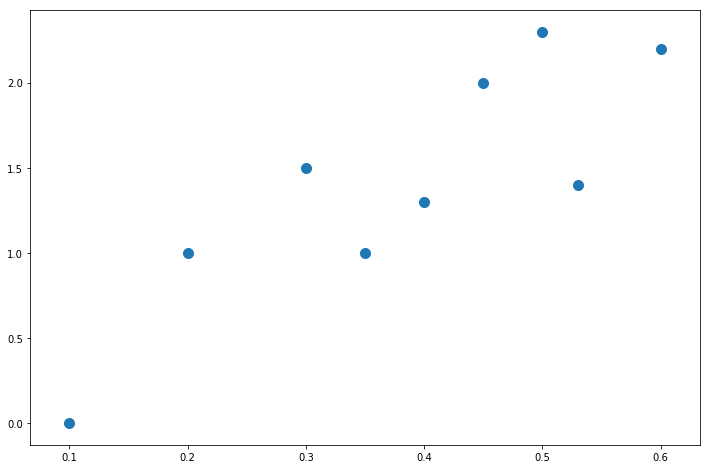

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([0.1,0.2,0.3,0.35,0.4,0.45,0.5,0.53,0.6])
y = np.array([0, 1, 1.5, 1, 1.3 ,2,2.3,1.4,2.2])

plt.figure(figsize=(12, 8))
plt.scatter(x, y,s=100)
plt.show()

In [36]:
# Проверки опущены для краткости примеров 
def mse_not_vectorized(y_pred, y):
    value = 0
    for i in range(len(y_pred)):
        value += (y_pred[i]-y[i])**2
    return value/len(y_pred)        

def mse(y_pred, y):
    return (y_pred-y).T.dot(y_pred-y)/len(y_pred)

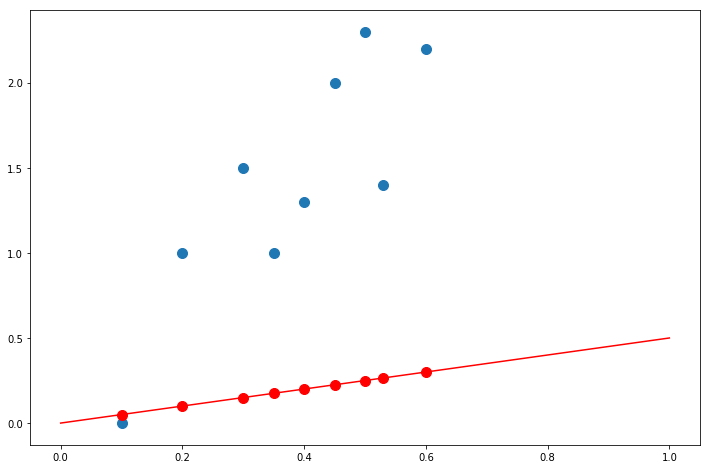

In [37]:
# y = w*x

w = 0.5
y_pred = w*x

plt.figure(figsize=(12, 8))
plt.scatter(x, y,s=100)
plt.scatter(x, y_pred,c='r',s=100)
plt.plot([0,1],[0*w,1*w], c="r")

plt.show()

In [38]:
print(mse_not_vectorized(y_pred,y))
print(mse(y_pred,y))

1.86410833333
1.86410833333


(1, 60)
(9, 1)


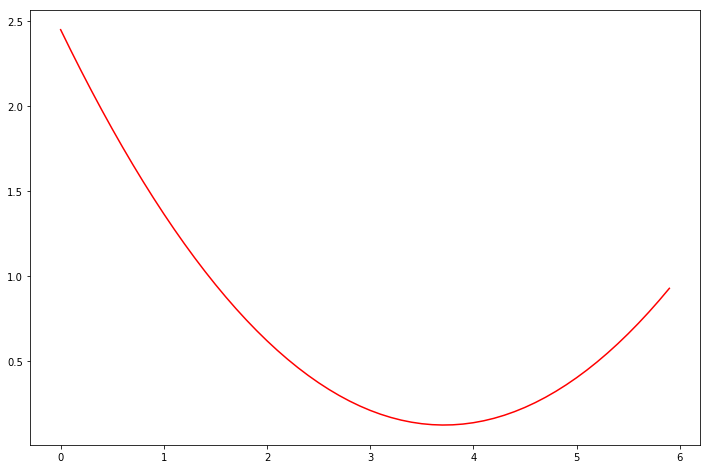

In [39]:
w = np.arange(0,6,0.1)
w = w.reshape((len(w),1))
x = x.reshape((len(x),1))
print(w.T.shape)
print(x.shape)

y_pred = w.dot(x.T)
mse_x = [ mse(x,y) for x in y_pred ]

plt.figure(figsize=(12, 8))
plt.plot(w,mse_x, c="r")

plt.show()


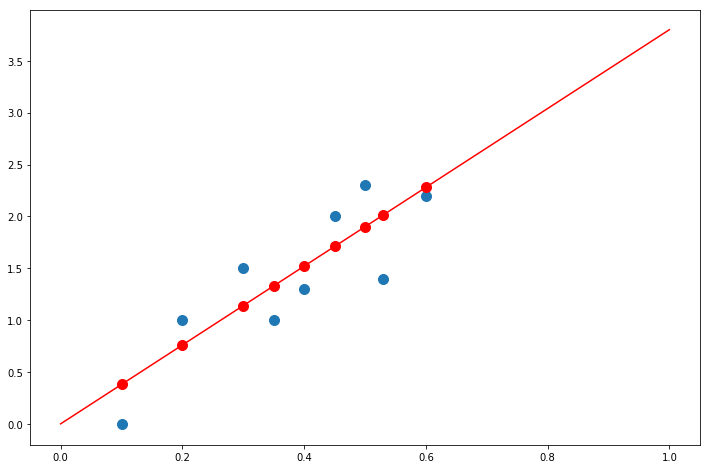

In [40]:
w = 3.8

y_pred = w*x

plt.figure(figsize=(12, 8))
plt.scatter(x, y,s=100)
plt.scatter(x, y_pred,c='r',s=100)
plt.plot([0,1],[0*w,1*w], c="r")

plt.show()

## Пример с линейной регрессией (нормальное уравление) <a id="norm"></a>

In [41]:
import numpy as np

a = np.array([10,20,30,40,50,60,70,80,90])
print(a)
print(a[[2,3]])

[10 20 30 40 50 60 70 80 90]
[30 40]


In [42]:
import numpy as np

a = np.array([10,None,30,40,None,60,None,80,90])
print(a)
a[a==None] = 0
print(a)

[10 None 30 40 None 60 None 80 90]
[10 0 30 40 0 60 0 80 90]


In [43]:
a = np.array([1,2,3,-1,-4,-5,3,-5,-6,2])
#a[a<0]=0

print(a[a<0])

[-1 -4 -5 -5 -6]


In [44]:
a = np.array([1,2,3,-1,5000,-5,3000,-5,-6,2])
a[np.logical_or(a<0, a>500)] = 0
print(a)

[1 2 3 0 0 0 0 0 0 2]


In [45]:
import numpy as np
import time
N = 10000000

In [46]:
#a = np.arange(1,10)
a = np.random.rand(N)
b = np.random.rand(N)

print(a.shape)
print(b.shape)

(10000000,)
(10000000,)


$$
\omega = (X^TX+\alpha I)^{-1} X^T y
$$

http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80)

https://www.kaggle.com/andonians/random-linear-regression

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
from numpy import genfromtxt
my_data = genfromtxt('test.csv', delimiter=',', skip_header=True)
print(my_data.shape)
print(my_data.dtype)

(300, 2)
float64


In [49]:
my_data[:1].shape

(1, 2)

$$
\omega = (X^TX)^{-1}X^Ty
$$

In [50]:
X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]

In [51]:
from numpy.linalg import pinv

X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]
y=y.reshape((len(y),1))

print(X.shape)
print(y.shape)

p = pinv(X.T.dot(X)).dot(X.T)
print(p.shape)
w=p.T.dot(y)

#print(w,y.shape)
#plt.figure(figsize=(16, 8))
#plt.scatter(my_data[:,0], my_data[:,1])
#plt.plot([0,100],[1,50], c="r")
#plt.show()

#%matplotlib inline



(1, 300)
(300, 1)
(300, 1)


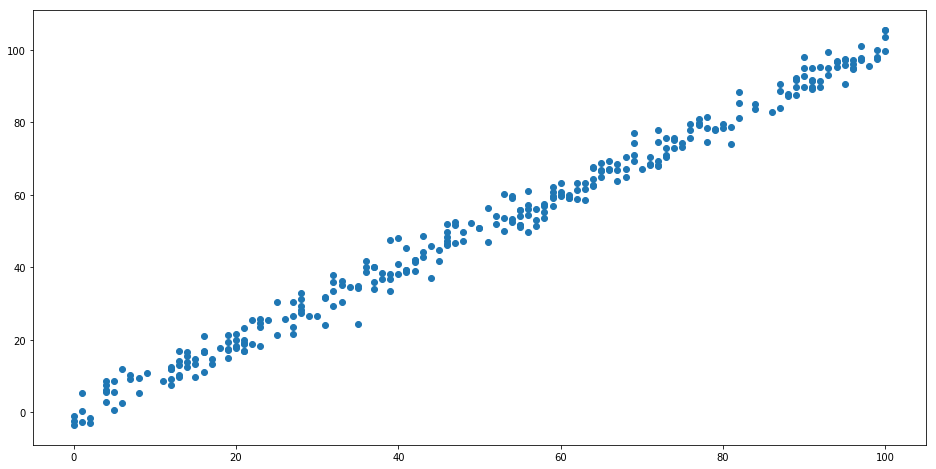

In [52]:
plt.figure(figsize=(16, 8))
plt.scatter(my_data[:,0], my_data[:,1])
plt.show()

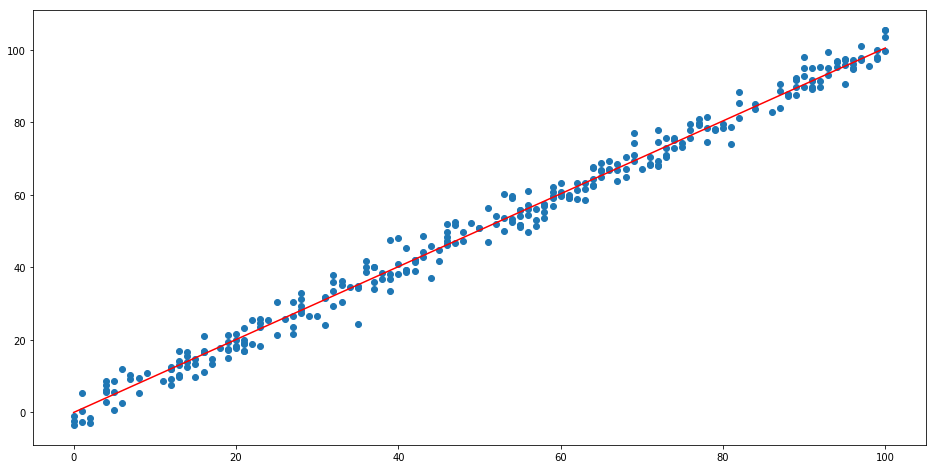

In [53]:
plt.figure(figsize=(16, 8))
plt.scatter(my_data[:,0], my_data[:,1])
plt.plot([0,100],[0*w[0],100*w[0]], c="r")
plt.show()